In [2]:
print("Hello world")

Hello world


In [19]:
!pip install streamlit

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
import streamlit as st
from streamlit.proto.RootContainer_pb2 import RootContainer

def _st_initialize():

    def _get_logger():
        from streamlit.logger import get_logger

        return get_logger()

    st.report_thread = True
    st._is_running_with_streamlit = True
    st._logger = _get_logger()

st._initialize = _st_initialize


In [37]:
df = pd.read_csv(r"C:\Users\andre\OneDrive\Documentos\Projetos_Python\Plotly2024\csgo_dados.csv")

In [38]:
df.head()

,Unnamed: 0,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
0,0,ZywOo,France,['Vitality'],854.0,22399.0,5248.0,1.38,1.28
1,1,s1mple,Ukraine,['Natus Vincere'],1429.0,37717.0,8070.0,1.33,1.25
2,2,deko,Russia,['1WIN'],190.0,5096.0,1250.0,1.42,1.24
3,3,saffee,Brazil,['paiN'],202.0,5383.0,1211.0,1.37,1.24
4,4,sh1ro,Russia,['Gambit'],744.0,19780.0,4593.0,1.43,1.22


In [39]:
df.tail()

,Unnamed: 0,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
805,805,adreN,United States,['Liquid'],697.0,18241.0,380.0,1.03,1.0
806,806,AaroN,United Kingdom,['Infused'],142.0,3698.0,-8.0,1.00,1.0
807,807,MODDII,Sweden,['Heroic'],1169.0,30527.0,408.0,1.02,1.0
808,808,void,Australia,['Ground Zero'],437.0,11368.0,127.0,1.02,1.0
809,809,pyth,Sweden,['NIP'],756.0,19801.0,-5.0,1.00,1.0


In [40]:
df.describe()

,total_maps,total_rounds,kd_diff,kd,rating
count,801.000000,801.000000,801.000000,801.000000,801.000000
mean,559.038702,14648.305868,876.593009,1.084944,1.052884
std,433.474506,11407.760695,1072.250782,0.067772,0.045023
min,100.000000,2487.000000,-98.000000,0.980000,1.000000
25%,204.000000,5361.000000,169.000000,1.040000,1.020000
50%,412.000000,10936.000000,458.000000,1.070000,1.040000
75%,820.000000,21258.000000,1171.000000,1.120000,1.080000
max,2025.000000,53382.000000,8070.000000,1.430000,1.280000


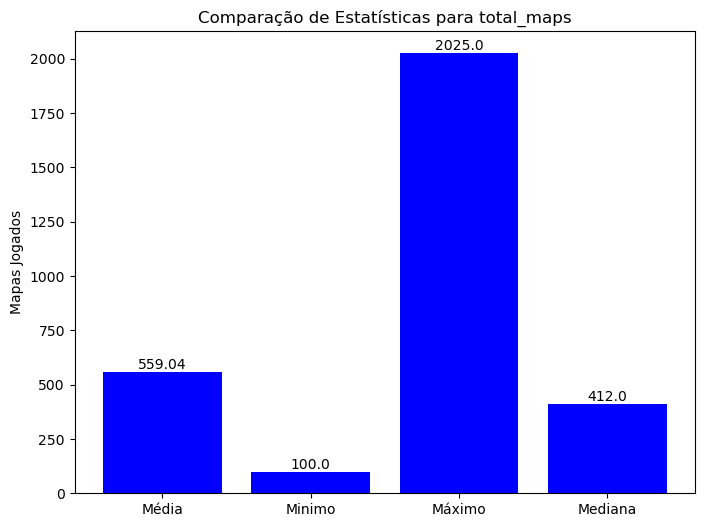

In [49]:
mean_value = df['total_maps'].mean()
min_value = df['total_maps'].min()
max_value = df['total_maps'].max()
median_value = df['total_maps'].median()

labels = ['Média', 'Minimo', 'Máximo', 'Mediana']
values = [mean_value, min_value, max_value, median_value]

plt.figure(figsize=(8, 4))
bars = plt.bar(labels, values, color=['blue'])
plt.title('Comparação de Estatísticas para total_maps')
plt.ylabel('Mapas Jogados')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom')

plt.show()

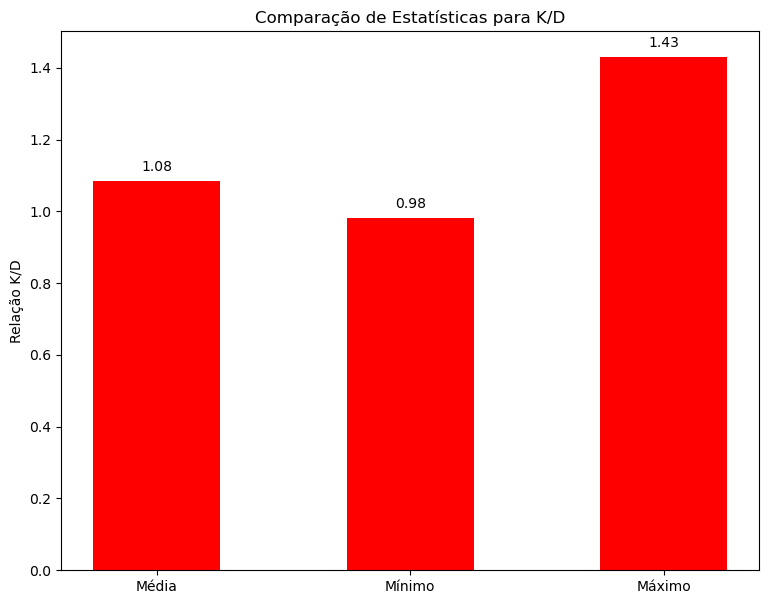

0.5


In [57]:
mean_value = df['kd'].mean()
min_value = df['kd'].min()
max_value = df['kd'].max()

labels = ['Média', 'Mínimo', 'Máximo']
values = [mean_value, min_value, max_value]

plt.figure(figsize=(9,7))
bars_kd = plt.bar(labels,values,color=['Red'], width = 0.5)
plt.title('Comparação de Estatísticas para K/D')
plt.ylabel('Relação K/D')

for bar in bars_kd:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom')
    
plt.show()
print(bar.get_width())

In [65]:
df.head(100)

,Unnamed: 0,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
0,0,ZywOo,France,['Vitality'],854.0,22399.0,5248.0,1.38,1.28
1,1,s1mple,Ukraine,['Natus Vincere'],1429.0,37717.0,8070.0,1.33,1.25
2,2,deko,Russia,['1WIN'],190.0,5096.0,1250.0,1.42,1.24
3,3,saffee,Brazil,['paiN'],202.0,5383.0,1211.0,1.37,1.24
4,4,sh1ro,Russia,['Gambit'],744.0,19780.0,4593.0,1.43,1.22
...,...,...,...,...,...,...,...,...,...
95,95,FREDDyFROG,Sweden,['Apeks'],1171.0,31220.0,3578.0,1.18,1.11
96,96,ottoNd,Finland,['HAVU'],820.0,21635.0,2505.0,1.19,1.11
97,97,gxx-,Albania,['BLINK'],145.0,3818.0,467.0,1.20,1.11
98,98,zorte,Russia,['forZe'],518.0,13789.0,1650.0,1.19,1.11


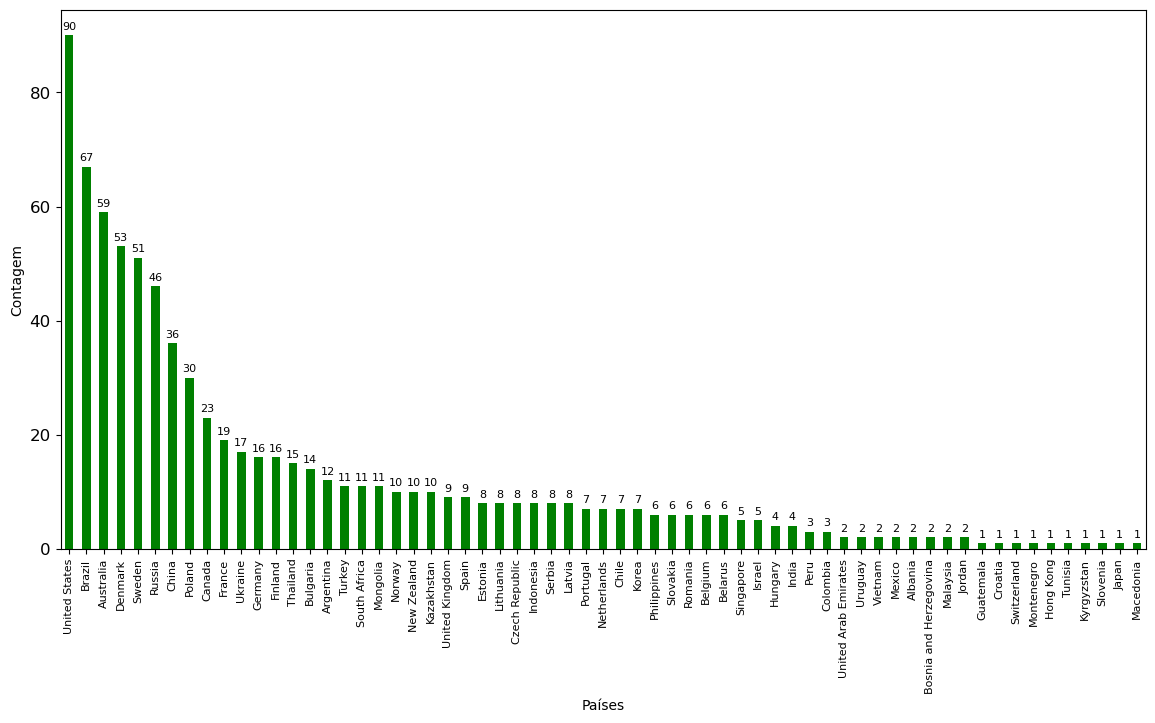

In [97]:
df2 = df
ax = df2['country'].value_counts().plot(kind='bar', color='green', figsize=(14,7))
plt.ylabel("Contagem")
plt.xlabel("Países")

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=12)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()+1),
                ha='center', va='baseline', fontsize=8, color='black')
    
    
plt.show()